In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


df = pd.read_csv("breast-cancer-wisconsin.csv")

In [150]:
df.head()

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4


In [151]:
def is_int(s):
    """
    :param s: str
    :return: bool
    """
    try: 
        int(s)
        return s
    except:
        return np.nan

In [152]:
df_int = df.applymap(is_int)

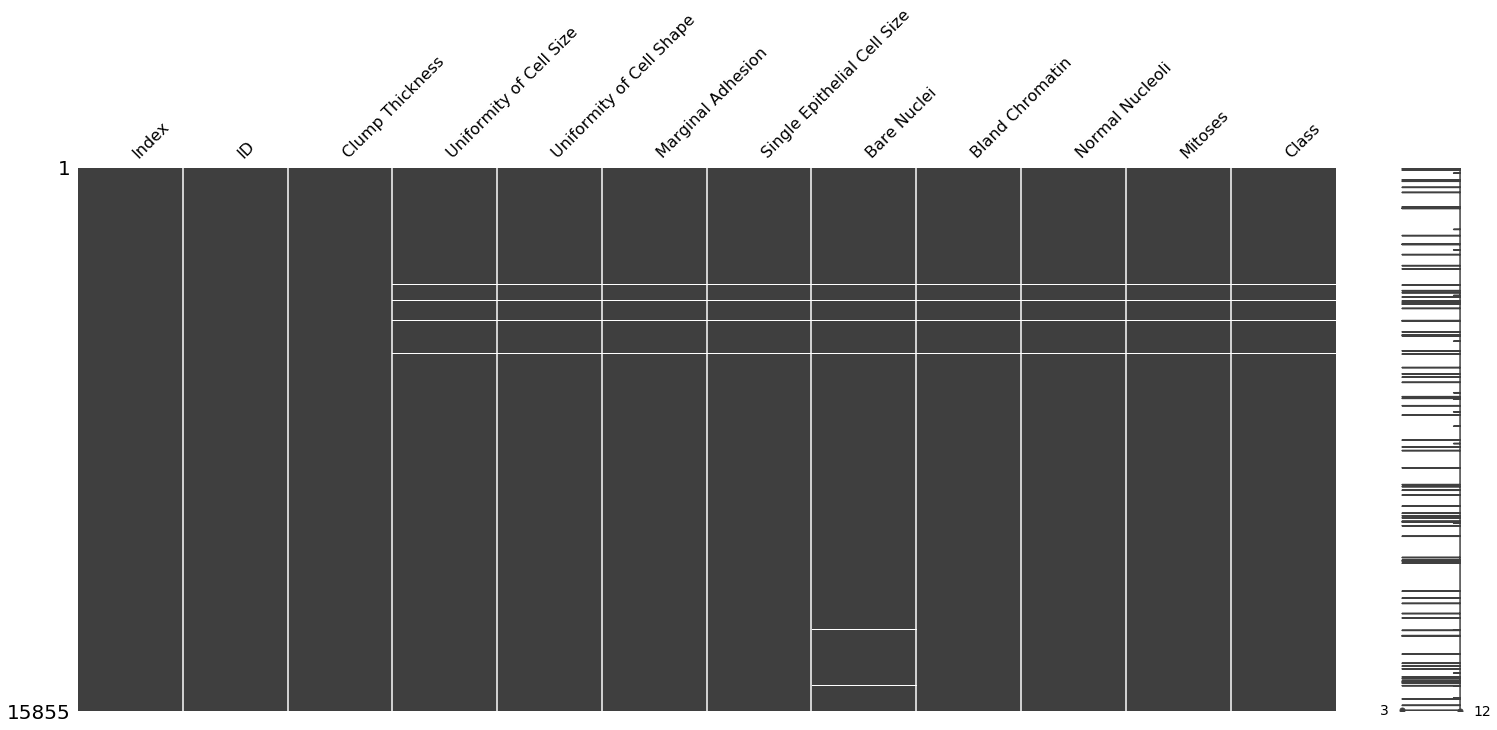

In [153]:
msno.matrix(df_int)
plt.show()

# Data imputation

In [154]:
# Drop NaN values
df_all = df_int.loc[df_int.Class.notnull()]

## Wrong classes

In [155]:
df_all.Class.value_counts()

4     15164
2       456
40      151
20        5
Name: Class, dtype: int64

In [156]:
df_all.loc[df.Class == '20']

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
2328,2328,12124220,40,10,10,10,20,10,30,10,10,20
2944,2944,12048980,60,10,10,10,20,10,30,10,10,20
12299,12299,12760910,10,30,10,10,20,10,20,20,10,20
12350,12350,12758070,40,20,40,30,20,20,20,10,10,20
14757,14757,12270810,30,10,10,30,20,10,10,10,10,20


In [157]:
# Divide the magnitude of wrong classes by 10
df_all.loc[(df.Class == '20') | (df.Class == '40'), list(df_all.columns[2:])] = df_all.loc[(df.Class == '20') | (df.Class == '40')].\
            iloc[:, 2:].applymap(lambda x: str(int(x) // 10))

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [158]:
df_all.loc[(df.Class == '20') | (df.Class == '40')].head()

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
167,167,12266120,7,5,6,3,3,8,7,4,1,4
213,213,11122090,8,10,10,1,3,6,3,9,1,4
243,243,11690490,7,3,4,4,3,3,3,2,7,4
374,374,11986410,10,10,6,3,3,10,4,3,2,4
765,765,11690490,7,3,4,4,3,3,3,2,7,4


In [159]:
df_impute = df_all.iloc[:, 2:]

In [160]:
df_impute = df_impute.drop('Bare Nuclei', axis=1)

In [161]:
df_impute = df_impute.applymap(int)

In [162]:
df_impute.shape

(15776, 9)

In [163]:
df_impute = df_impute.join(pd.get_dummies(df_all.ID, prefix='ID'))

In [164]:
df_impute_y = df_all.loc[:, 'Bare Nuclei']
df_impute_xtr = df_impute.loc[df_impute_y.notnull()]
df_impute_xte = df_impute.loc[df_impute_y.isnull()]
df_impute_ytr = df_impute_y.loc[df_impute_y.notnull()]

In [167]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [168]:
knn.fit(df_impute_xtr, df_impute_ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [124]:
knn.score(df_impute_xtr, df_impute_ytr)

0.9896573604060914

In [169]:
df_impute_yte = knn.predict(df_impute_xte)

In [170]:
df_impute_yte.shape

(16,)

In [171]:
df_impute_yte

array(['1', '1', '1', '6', '1', '10', '1', '1', '1', '1', '8', '1', '1',
       '1', '1', '10'], dtype=object)

In [172]:
df_impute_y.loc[df_impute_y.isnull()] = df_impute_yte

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [173]:
df_impute_y.shape

(15776,)

In [174]:
df_imputed = df_impute.join(df_impute_y.apply(int))

In [175]:
df_imputed.shape

(15776, 675)

In [176]:
df_imputed.iloc[:, :8].head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
0,7,8,3,7,4,7,8,2
1,6,10,5,5,4,6,10,1
2,8,6,4,10,10,3,5,1
3,7,5,6,3,3,7,4,1
4,5,10,10,10,6,6,5,2


# Train Test split

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
xtr, xte, ytr, yte = train_test_split(df_imputed, df_all.Class, test_size = 0.2, random_state = 42)

In [181]:
[xtr.shape[0], xte.shape[0]]

[12620, 3156]

In [182]:
ytr.value_counts()

4    12259
2      361
Name: Class, dtype: int64

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
lr = LogisticRegression()
lr.fit(xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [185]:
lr.score(xtr, ytr)

0.9996038034865293

In [186]:
lr.score(xte, yte)

0.9996831432192649

In [197]:
from sklearn.metrics import f1_score, accuracy_score

In [198]:
accuracy_score(ytr, lr.predict(xtr))

0.9996038034865293

In [201]:
f1_score(ytr, lr.predict(xtr), pos_label='2')

0.99302649930265

In [194]:
np.unique(lr.predict(xtr))

array(['2', '4'], dtype=object)

In [195]:
ytr.value_counts()

4    12259
2      361
Name: Class, dtype: int64